In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

# Import API keys
from api_keys import g_key
from api_keys import meteostat_api_key
# from api_keys import open_cage_api_key

gmaps.configure(api_key=g_key)

# Taxi Data
* Read CSV
* Ride volume by day
* Ride volume by Neighborhood
* Avg Ride volume by month



### Read CSV file

In [3]:
#importing Yellow Cab Taxi Ride data from .csv
# PULocationID = Pickup Location ID
# DOLocationID = Drop-off Location ID

# Contains the info for every taxi cab ride in New York City in January 2019

taxi_data = pd.read_csv("../resources/taxi_data/combined_months.csv")

# Contains each official Taxi Pickup Zone in NYC 

pickup_zone_data = pd.read_csv("../resources/taxi_data/nyc_pickup_zones.csv")
pickup_zone_data = pickup_zone_data.rename(columns={'OBJECTID': 'PULocationID'})

# Neighborhood Data

with open("../resources/taxi_data/neighborhoods.json") as json_data:
    neighborhood_data = json.load(json_data)
    


In [4]:
# Setting up the Latitude and Longitude empty columns will pull these coordinates from Neighborhood Data
taxi_data['Latitude'] =""
taxi_data['Longitude'] =""

# Merging the 'taxi_data' and 'pickup_zone_data' on PULocationID (aka Zone ID)
# This is essentially grabbing the PULocationID from 'taxi_data' and finding it's name in 'pickup_zone_data'
merged_taxi_zones = pd.merge(taxi_data,pickup_zone_data, how='inner',on="PULocationID")



# Filtering the 'merged_taxi_zones' dataframe so it only include rides that happened in Manhattan
manhattan_taxi_zones = merged_taxi_zones[(merged_taxi_zones['borough']=='Manhattan')]


# counting the number of pickups in each pickup zone



#manhattan_taxi_zones.head(100)

# manhattan_taxi_zones['tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime'])

manhattan_taxi_zones.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime']).dt.date

manhattan_taxi_zones.sort_values(by='tpep_pickup_datetime', ascending=False)


manhattan_taxi_zones

C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ca,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Latitude,Longitude,Shape_Leng,zone,borough
0,6664.0,1.0,2019-01-01,1/1/2019 0:35,1.0,5.60,1.0,N,158.0,236.0,...,0.00,0.0,0.3,24.80,NaN,,,0.054810,Meatpacking/West Village West,Manhattan
1,10283.0,2.0,2019-01-01,1/1/2019 1:11,1.0,1.65,1.0,N,158.0,148.0,...,2.16,0.0,0.3,12.96,NaN,,,0.054810,Meatpacking/West Village West,Manhattan
2,24495.0,1.0,2019-01-01,1/1/2019 1:19,1.0,1.10,1.0,N,158.0,186.0,...,1.45,0.0,0.3,8.75,NaN,,,0.054810,Meatpacking/West Village West,Manhattan
3,15829.0,2.0,2019-01-01,1/1/2019 1:42,1.0,1.77,1.0,N,158.0,186.0,...,0.00,0.0,0.3,9.30,NaN,,,0.054810,Meatpacking/West Village West,Manhattan
4,22484.0,1.0,2019-01-01,1/1/2019 2:04,3.0,2.70,1.0,N,158.0,87.0,...,2.65,0.0,0.3,15.95,NaN,,,0.054810,Meatpacking/West Village West,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593198,2659228.0,2.0,2019-05-11,5/11/2019 10:37,1.0,2.67,1.0,N,153.0,20.0,...,0.00,0.0,0.3,11.30,0.0,,,0.024737,Marble Hill,Manhattan
593199,2547957.0,2.0,2019-06-11,6/11/2019 23:47,1.0,0.85,1.0,N,153.0,127.0,...,0.00,0.0,0.3,6.30,0.0,,,0.024737,Marble Hill,Manhattan
593200,5277542.0,2.0,2019-06-23,6/23/2019 16:54,1.0,0.69,1.0,N,153.0,127.0,...,1.06,0.0,0.3,6.36,0.0,,,0.024737,Marble Hill,Manhattan
593201,6350280.0,1.0,2019-06-28,6/28/2019 7:29,0.0,6.70,1.0,N,153.0,41.0,...,0.00,0.0,0.3,23.80,0.0,,,0.024737,Marble Hill,Manhattan


### Import Lat/Lng for each pickup zone


In [5]:
#neighborhood_data['features'][0]['geometry']['coordinates']


# Returns neighborhood

# manhattan_taxi_zones.set_index("zone",inplace = True)

# manhattan_taxi_zones

# coords_list = []


# for index, column in manhattan_taxi_zones.iterrows():
#     neighbohood_name = neighborhood_data['features'][0]['properties']['name']
#     coords = neighborhood_data['features'][0]['geometry']['coordinates']
    
#     try:
#         coords_list.append(neighbohood_name)
#         print(f"Coords: {neighbohood_name}")
#     except:
#         coords_list.append("Not found, try changing name")
#     continue


    


### Ride Volume By Day


In [1]:
ride_volume_per_day = manhattan_taxi_zones["tpep_pickup_datetime"].value_counts()
ride_volume_per_day_df = pd.DataFrame(ride_volume_per_day)
ride_volume_per_day_dfreset = ride_volume_per_day_df.reset_index()


# plt.figure(figsize=(16,3))
# ride_volume_per_day.plot.line()

ride_volume_per_day_dfrename = ride_volume_per_day_dfreset.rename(columns = {'index': 'date', 'tpep_pickup_datetime': 'Ride Volume'})
ride_volume_per_day_dfrename.sort_values('date').head()

NameError: name 'manhattan_taxi_zones' is not defined

### Ride Volume By Neighborhood


Text(0, 0.5, 'Neighbhorhood')

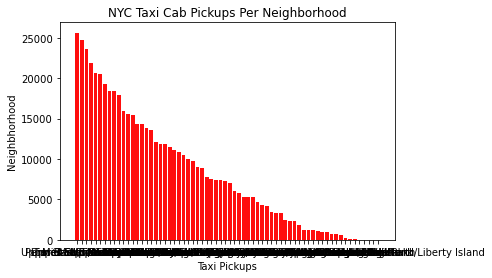

In [7]:
zone_count = manhattan_taxi_zones['zone'].value_counts()
neighborhood_count = pd.DataFrame(zone_count).reset_index()
neighborhood_count.columns = ['Neighborhood','Rides']

neighborhood_count

zone_count


x_axis = neighborhood_count['Neighborhood']
y_axis = neighborhood_count['Rides']


neighborhood_count
count_status = pd.value_counts(manhattan_taxi_zones['zone'])
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.95, align="center")
plt.title("NYC Taxi Cab Pickups Per Neighborhood")
plt.xlabel("Taxi Pickups")
plt.ylabel("Neighbhorhood")



### Avg Ride Volume by Month

In [8]:

ride_volume_per_day_dfrename['month'] = pd.DatetimeIndex(ride_volume_per_day_dfrename['Date']).month
avg_vol_month = round(ride_volume_per_day_dfrename.groupby(['month']).mean(),0)
avg_vol_month = avg_vol_month.rename(columns = {'Ride Volume': 'Avg Ride Volume'})
avg_vol_month

,Avg Ride Volume
month,
1,2921.0
2,3256.0
3,2937.0
4,3027.0
5,2923.0
6,3008.0


# Weather Data
* Top 10 Days for each Weather type (Rain, Snow, Tmax, Tmin, Wind)
* Create DF with all the days above removed (normal weather)
* Visuals to show above

In [49]:
# Read in the Weather CVS data
file_to_load = "../resources/weather_data/ny_weather_0119-0619.csv"
weather_df = pd.read_csv(file_to_load)
weather_df_cleaned = weather_df.drop(columns = ['Unnamed: 0', 'Avg Temp', 'Wind Direction', 'Wind Peak Gust', 'Air Pressure', 'Total Sun Duration'])
weather_df_cleaned['date'] = pd.to_datetime(weather_df_cleaned.date).dt.date
# weather_df_cleaned

In [50]:
# Top 10 Rain Data
precipitation_df = weather_df_cleaned.sort_values(by="Precipitation",ascending=False).reset_index(drop=True)
final_precipitation_df = precipitation_df.iloc[:10]
final_precipitation_df['month'] = pd.DatetimeIndex(final_precipitation_df['date']).month

# Top 10 Snow Data
snow_df = weather_df_cleaned.sort_values(by="Snowfall",ascending=False).reset_index(drop=True)
final_snow_df = snow_df.iloc[:10]
final_snow_df['month'] = pd.DatetimeIndex(final_precipitation_df['date']).month

# Top 10 Wind Data
wind_df = weather_df_cleaned.sort_values(by="Wind Speed",ascending=False).reset_index(drop=True)
final_wind_df = wind_df.iloc[:10]
final_wind_df['month'] = pd.DatetimeIndex(final_wind_df['date']).month

# Top 10 Max Temp Data
tmax_df = weather_df_cleaned.sort_values(by="Max Temp",ascending=False).reset_index(drop=True)
final_tmax_df = tmax_df.iloc[:10]
final_tmax_df['month'] = pd.DatetimeIndex(final_tmax_df['date']).month

# Top 10 Min Temp Data (lowest)
tmin_df = weather_df_cleaned.sort_values(by="Min Temp",ascending=True).reset_index(drop=True)
final_tmin_df = tmin_df.iloc[:10]
final_tmin_df['month'] = pd.DatetimeIndex(final_tmin_df['date']).month

# final_precipitation_df
# final_snow_df
# final_wind_df
# final_tmax_df
# final_tmin_df


C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

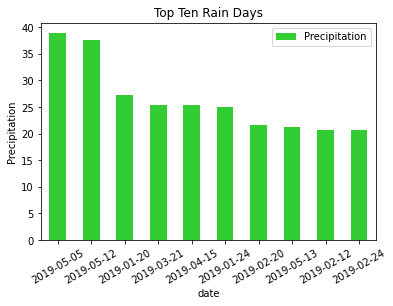

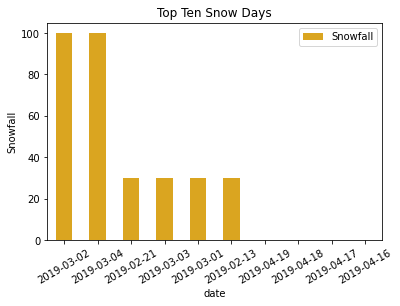

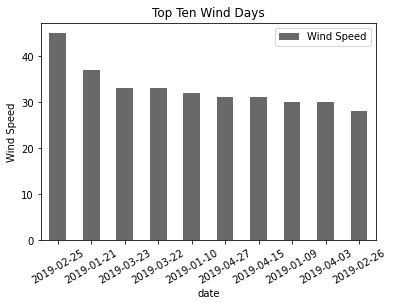

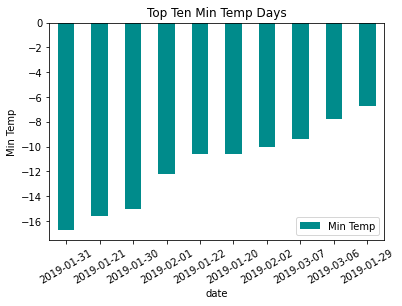

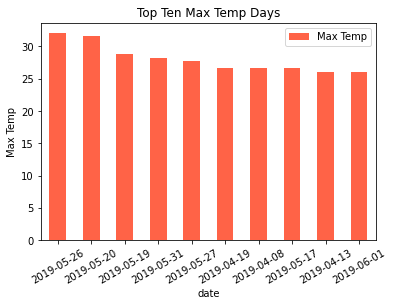

In [165]:
# # Top 10 Weather Graphs
# # Rain
# final_precipitation_df.plot.bar(x="date",y="Precipitation", color = "limegreen")
# plt.ylabel("Precipitation")
# plt.title("Top Ten Rain Days")
# plt.xticks(rotation=30, horizontalalignment="center")

# # Snow
# final_snow_df.plot.bar(x="date",y="Snowfall", color = "goldenrod")
# plt.ylabel("Snowfall")
# plt.title("Top Ten Snow Days")
# plt.xticks(rotation=30, horizontalalignment="center")

# # Wind
# final_wind_df.plot.bar(x="date",y="Wind Speed",color="dimgrey")
# plt.ylabel("Wind Speed")
# plt.title("Top Ten Wind Days")
# plt.xticks(rotation=30, horizontalalignment="center")

# # Tmin
# final_tmin_df.plot.bar(x="date",y="Min Temp", color="darkcyan")
# plt.ylabel("Min Temp")
# plt.title("Top Ten Min Temp Days")
# plt.xticks(rotation=30, horizontalalignment="center")

# # Tmax
# final_tmax_df.plot.bar(x="date",y="Max Temp", color = "tomato")
# plt.ylabel("Max Temp")
# plt.title("Top Ten Max Temp Days")
# plt.xticks(rotation=30, horizontalalignment="center")

# Taxi Ride Volume vs Weather
* Ride volume for each day in each Top 10 weather types
* Average ride volume for "normal weather" days for each month
* Difference in Top 10 ride volumes vs "normal weather" ride volumes for the month that 


In [168]:
# Merge Rain and Ride Vol per day; Merge Avg ride vol by month
rain_rides = pd.merge(final_precipitation_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
rain_rides_avg = pd.merge(rain_rides, avg_vol_month, how = 'left', on = 'month')
rain_rides_avg['% Change in Rides'] = (rain_rides_avg['Ride Volume'] - rain_rides_avg['Avg Ride Volume']) / rain_rides_avg['Avg Ride Volume']

# Merge Snow and Ride Vol per day; Merge Avg ride vol by month
snow_rides = pd.merge(final_snow_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
snow_rides_avg = pd.merge(snow_rides, avg_vol_month, how = 'left', on = 'month')
snow_rides_avg['% Change in Rides'] = (snow_rides_avg['Ride Volume'] - snow_rides_avg['Avg Ride Volume']) / snow_rides_avg['Avg Ride Volume']

# Merge Wind and Ride Vol per day; Merge Avg ride vol by month
wind_rides = pd.merge(final_wind_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
wind_rides_avg = pd.merge(wind_rides, avg_vol_month, how = 'left', on = 'month')
wind_rides_avg['% Change in Rides'] = (wind_rides_avg['Ride Volume'] - wind_rides_avg['Avg Ride Volume']) / wind_rides_avg['Avg Ride Volume']

# Merge Max Temp and Ride Vol per day; Merge Avg ride vol by month
tmax_rides = pd.merge(final_tmax_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
tmax_rides_avg = pd.merge(tmax_rides, avg_vol_month, how = 'left', on = 'month')
tmax_rides_avg['% Change in Rides'] = (tmax_rides_avg['Ride Volume'] - tmax_rides_avg['Avg Ride Volume']) / tmax_rides_avg['Avg Ride Volume']

# Merge Min Temp and Ride Vol per day; Merge Avg ride vol by month
tmin_rides = pd.merge(final_tmin_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
tmin_rides_avg = pd.merge(tmin_rides, avg_vol_month, how = 'left', on = 'month')
tmin_rides_avg['% Change in Rides'] = (tmin_rides_avg['Ride Volume'] - tmin_rides_avg['Avg Ride Volume']) / tmin_rides_avg['Avg Ride Volume']


# rain_rides_avg
# snow_rides_avg
# wind_rides_avg
# tmax_rides_avg
# tmin_rides_avg


,Min Temp,Wind,Snow,Rain,Max Temp
0,4.51%,1.22%,1.14%,-3.43%,-7.71%


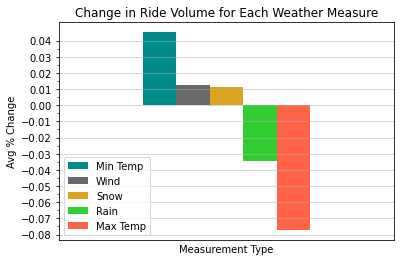

In [190]:
# Plotting the change in ride volume

# Calculate the average change for top 10 days for each category
pd.options.display.float_format = '{:,.2%}'.format
avg_rain_change = rain_rides_avg['% Change in Rides'].mean()
avg_snow_change = snow_rides_avg['% Change in Rides'].mean()
avg_wind_change = wind_rides_avg['% Change in Rides'].mean()
avg_tmax_change = tmax_rides_avg['% Change in Rides'].mean()
avg_tmin_change = tmin_rides_avg['% Change in Rides'].mean()


# Store data in dataframe for plotting
avg_change_df = pd.DataFrame({'Min Temp': avg_tmin_change,
                              'Wind': avg_wind_change,
                              'Snow': avg_snow_change,
                              'Rain': avg_rain_change,
                              'Max Temp': avg_tmax_change}, 
                             index=[0])


# Plot Formatting
avg_plot = avg_change_df.plot.bar(color=['darkcyan','dimgray','goldenrod','limegreen' ,'tomato'])
avg_plot.set_yticks(np.arange(-.08, .045, step=.005), minor=True)
avg_plot.set_yticks(np.arange(-.08, .045, step=.01), minor=False)
avg_plot.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
avg_plot.set_ylabel('Avg % Change')
avg_plot.set_xlabel('Measurement Type')
avg_plot.set_xticks([])
avg_plot.set_title('Change in Ride Volume for Each Weather Measure')
avg_plot
avg_change_df

In [ ]:
# Display Top 10 days for Min Temp to show the fu
rain_rides_avg.plot.bar(x="date",y='% Change in Rides', color = "lightgreen")
plt.ylabel("% Change in Rides")
plt.title("% Change in Ride Vol for Top 10 Rain Days")
plt.xticks(rotation=30, horizontalalignment="center")




## Comments about the above...
#### Ride Volume Change for Min Temp
* The days that we see a negative decline (1/21 & 1/20) are more than likely due to Martin Luther King Jr. holiday and being a Sunday
* We might need to filter out weekends (Sat and/or Sun) if we find that they are contradicting week days

#### Ride Volume Change for Max Temp
* Same as min temp, we also see the a holiday in the top 10. The sunday before and day of Memorial Day we see drastic declines from the average ride volume
* Seeing more and more reason to remove weekends